# Computational Methods 
## HW 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate as interp
# Single precision digits
print(np.float32(1.23456789012345))
test = np.float32(1.23456789012345)
print(test.dtype)
print((2*test**2+1).dtype)
print(np.sin(test).dtype)
for i in [test]:
    print(np.linspace(0,i-1,len([test])).dtype)
print(np.sin(test, dtype=np.float64).dtype)
print((1/3)*np.float32(1))
print(np.float32(1/3))
print((np.float32(1)+np.float64(1)).dtype)

1.2345679
float32
float32
float32
float32
float64
0.33333334
0.33333334
float64


### Problem 1

Differentiate the functions $\cos{(x)}$ and $\exp{(x)}$ at $x=0.1,10$ using single precision forward-, central-, and extrapolated-difference algorithms.

**a)**
Write a code that implements these three methods.

**b)**
Make a log-log plot of the relative error, $\varepsilon$, vs. step size, $h$, and check whether the scaling and the number of significant digits obtained agrees with simple estimates.

**c)**
Truncation and roundoff error manifest themselves in different regimes in these plots. Clearly identify these regimes.

In [2]:
# Part (a)
def forward(fxn, x, h):
    x = np.float32(x)
    h = np.float32(h)
    return (fxn(x+h)-fxn(x))/h
def central(fxn, x, h):
    x = np.float32(x)
    h = np.float32(h)
    return (fxn(x+h)-fxn(x-h))/(2*h)
def extrapolated(fxn, x, h):
    x = np.float32(x)
    h = np.float32(h)
    fp1 = (fxn(x+h)-fxn(x-h))/(2*h)
    fp2 = (fxn(x+2*h)-fxn(x-2*h))/(4*h)
    return (4*fp1-fp2)/3


In [3]:
# Part (b)
#d/dx(cos(x))=-sin(x)
def nsin(x, **kwargs):
    return -np.sin(x, **kwargs)

def relative_error(actual, mine, original, x, h):
    return np.abs((actual(x, dtype=np.float64) - mine(original, x, h))/actual(x, dtype=np.float64))



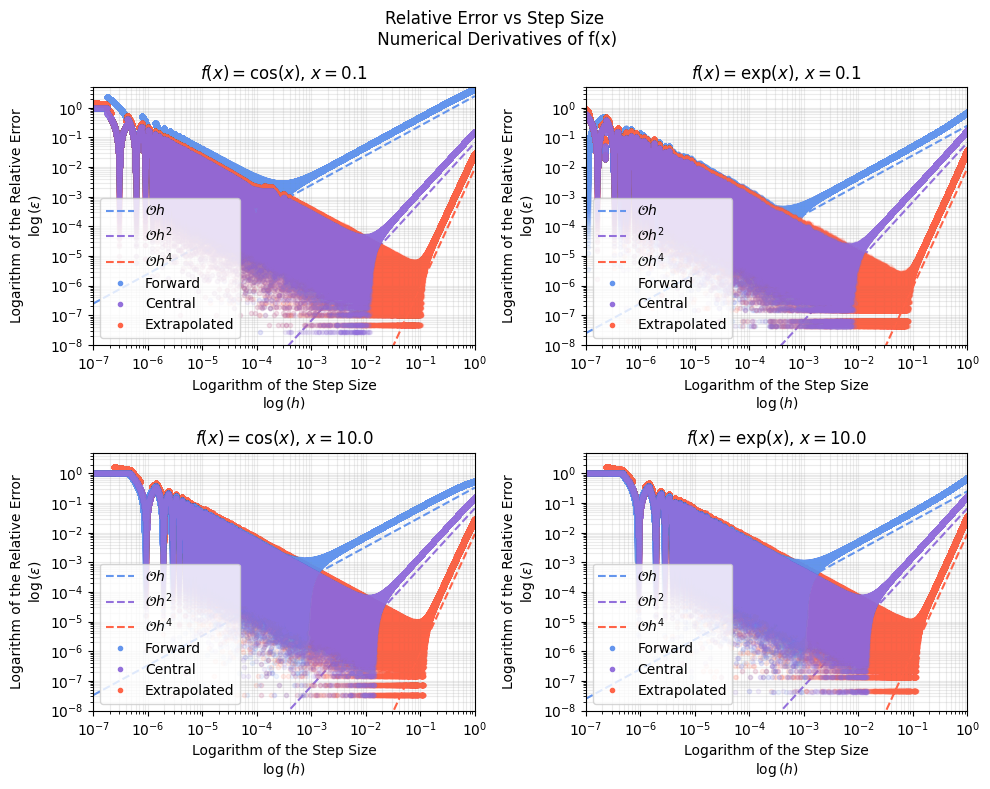

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

numpoints = int(1e6)

# --- Top-Left ---
ax1 = axes[0]

Earr = np.logspace(-7,0,2)
ax1.loglog(Earr,Earr*2.5,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h$", color="cornflowerblue")
ax1.loglog(Earr,Earr**2 /15,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h^2$", color="mediumpurple")
ax1.loglog(Earr,Earr**4 /110,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h^4$", color="tomato")

xval = 0.1
harr = np.logspace(-7,0,numpoints)
ax1.loglog(harr,relative_error(nsin,forward,np.cos,xval,harr),
           linestyle='', marker='.', label="Forward", color="cornflowerblue")
ax1.loglog(harr,relative_error(nsin,extrapolated,np.cos,xval,harr),
           linestyle='', marker='.', label="Extrapolated", color="tomato")
ax1.loglog(harr,relative_error(nsin,central,np.cos,xval,harr),
           linestyle='', marker='.', label="Central", color="mediumpurple")
ax1.set_title("$f(x)=\\cos(x)$, $x=0.1$")
ax1.set_xlabel("Logarithm of the Step Size\n$\\log{(h)}$")
ax1.set_ylabel("Logarithm of the Relative Error\n$\\log{(\\varepsilon)}$")
### Legend
handles, labels = ax1.get_legend_handles_labels()
order = [0,1,2,3,5,4]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left')
### 
[handle.set_alpha(0.1) for handle in handles[3:]]

ax1.set_ylim(1e-8,5)
ax1.set_xlim(1e-7,1)
ax1.grid(which='both',alpha=0.25)

# --- Top-Right ---
ax2 = axes[1]

Earr = np.logspace(-7,0,2)
ax2.loglog(Earr,Earr/4,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h$", color="cornflowerblue")
ax2.loglog(Earr,Earr**2 /15,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h^2$", color="mediumpurple")
ax2.loglog(Earr,Earr**4 /110,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h^4$", color="tomato")

xval = 0.1
harr = np.logspace(-7,0,numpoints)
ax2.loglog(harr,relative_error(np.exp,forward,np.exp,xval,harr),
           linestyle='', marker='.', label="Forward", color="cornflowerblue")
ax2.loglog(harr,relative_error(np.exp,extrapolated,np.exp,xval,harr),
           linestyle='', marker='.', label="Extrapolated", color="tomato")
ax2.loglog(harr,relative_error(np.exp,central,np.exp,xval,harr),
           linestyle='', marker='.', label="Central", color="mediumpurple")
ax2.set_title("$f(x)=\\exp(x)$, $x=0.1$")
ax2.set_xlabel("Logarithm of the Step Size\n$\\log{(h)}$")
ax2.set_ylabel("Logarithm of the Relative Error\n$\\log{(\\varepsilon)}$")
### Legend
handles, labels = ax2.get_legend_handles_labels()
order = [0,1,2,3,5,4]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left')
### 
[handle.set_alpha(0.1) for handle in handles[3:]]
ax2.set_ylim(1e-8,5)
ax2.set_xlim(1e-7,1)
ax2.grid(which='both',alpha=0.25)

# --- Bottom-Left ---
ax3 = axes[2]

Earr = np.logspace(-7,0,2)
ax3.loglog(Earr,Earr/3,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h$", color="cornflowerblue")
ax3.loglog(Earr,Earr**2 /15,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h^2$", color="mediumpurple")
ax3.loglog(Earr,Earr**4 /110,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h^4$", color="tomato")


xval = 10.0
harr = np.logspace(-7,0,numpoints)
ax3.loglog(harr,relative_error(nsin,extrapolated,np.cos,xval,harr),
           linestyle='', marker='.', label="Extrapolated", color="tomato")
ax3.loglog(harr,relative_error(nsin,forward,np.cos,xval,harr),
           linestyle='', marker='.', label="Forward", color="cornflowerblue")
ax3.loglog(harr,relative_error(nsin,central,np.cos,xval,harr),
           linestyle='', marker='.', label="Central", color="mediumpurple")
ax3.set_title("$f(x)=\\cos(x)$, $x=10.0$")
ax3.set_xlabel("Logarithm of the Step Size\n$\\log{(h)}$")
ax3.set_ylabel("Logarithm of the Relative Error\n$\\log{(\\varepsilon)}$")
### Legend
handles, labels = ax3.get_legend_handles_labels()
order = [0,1,2,4,5,3]
ax3.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left')
### 
[handle.set_alpha(0.1) for handle in handles[3:]]
ax3.set_ylim(1e-8,5)
ax3.set_xlim(1e-7,1)
ax3.grid(which='both',alpha=0.25)


# --- Bottom-Right ---
ax4 = axes[3]

Earr = np.logspace(-7,0,2)
ax4.loglog(Earr,Earr/4,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h$", color="cornflowerblue")
ax4.loglog(Earr,Earr**2 /15,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h^2$", color="mediumpurple")
ax4.loglog(Earr,Earr**4 /110,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}h^4$", color="tomato")


xval = 10.0
harr = np.logspace(-7,0,numpoints)
ax4.loglog(harr,relative_error(np.exp,extrapolated,np.exp,xval,harr),
           linestyle='', marker='.', label="Extrapolated", color="tomato")
ax4.loglog(harr,relative_error(np.exp,forward,np.exp,xval,harr),
           linestyle='', marker='.', label="Forward", color="cornflowerblue")
ax4.loglog(harr,relative_error(np.exp,central,np.exp,xval,harr),
           linestyle='', marker='.', label="Central", color="mediumpurple")
ax4.set_title("$f(x)=\\exp(x)$, $x=10.0$")
ax4.set_xlabel("Logarithm of the Step Size\n$\\log{(h)}$")
ax4.set_ylabel("Logarithm of the Relative Error\n$\\log{(\\varepsilon)}$")
### Legend
handles, labels = ax4.get_legend_handles_labels()
order = [0,1,2,4,5,3]
ax4.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left')
### 
[handle.set_alpha(0.1) for handle in handles[3:]]
ax4.set_ylim(1e-8,5)
ax4.set_xlim(1e-7,1)
ax4.grid(which='both',alpha=0.25)

# ---
fig.suptitle('Relative Error vs Step Size\n Numerical Derivatives of f(x)')
plt.tight_layout()
plt.savefig("differentiation.png", dpi=300, bbox_inches='tight')
plt.show()

In [198]:
# Part (c)


### Problem 2

Consider the integral,

$$I=\int_0^1 \exp{(-t)}\mathrm{d}t,$$

and compare the relative error, $\varepsilon$, for the midpoint rule, trapezoid rule, and Simpson's rule for single precision.

**a)**
Write code that implements each method.

**b)**
Make a log-log plot of $\varepsilon$ as a function of number of bins, $N$. (Since this is a log-log plot, choose values that scale in a reasonable fashion.) Make $N$ large enough such that you see the effects of roundoff error.

**c)**
Explain what you see in the plot.

In [76]:
# Part (a)

def midpoint(fxn, a, b, N):
    # I = h * Sum(f(xi))
    a = np.float32(a)
    b = np.float32(b)
    N = np.float32(N)
    resultarr = []
    for n in N:
        h = (b-a)/n
        x = (np.linspace(0,n-1,int(n))+0.5) * h + a
        result = h * np.sum(fxn(x))
        resultarr.append(result)
    return np.array(resultarr)

def trapezoid(fxn, a, b, N):
    # I = h * (0.5 * f(a) + 0.5 * f(b) + Sum(f(xi)) )
    a = np.float32(a)
    b = np.float32(b)
    N = np.float32(N)
    resultarr = []
    for n in N:
        h = np.float32((b-a)/n)
        x = np.linspace(1,n-1,int(n-1)) * h + a
        result = h * np.sum(fxn(x))
        resultarr.append(result)
    h = np.float32((b-a)/N)
    return np.array(resultarr) + h * (0.5 * fxn(a) + 0.5 * fxn(b))

def simpson(fxn, a, b, N):
    # N should be even
    # I = (1/3) * h * ( f(a)+f(b)+4*Sum(f(xi))+2*Sum(f(x(i-1))) )
    a = np.float32(a)
    b = np.float32(b)
    N = np.float32(N)
    resultarrA = []
    resultarrB = []
    for n in N:
        h = np.float32((b-a)/n)
        sumA = (4/3) * h * np.sum(fxn(np.linspace(1,n-1,int(n-1))[::2] * h + a))
        sumB = (2/3) * h * np.sum(fxn(np.linspace(1,n-1,int(n-1))[1::2] * h + a))
        resultarrA.append(sumA)
        resultarrB.append(sumB)
    h = np.float32((b-a)/N)
    return np.array(resultarrA) + np.array(resultarrB) + (1/3) * h * ( fxn(a) + fxn(b) )


In [77]:
Narr = 2*np.array(list(set(np.logspace(0,7,int(1e3), dtype=np.int32))))

#print(Narr)
print(5e6*2)
print(1e8)
print(2*10**7.69897)

10000000.0
100000000.0
99999999.0015948


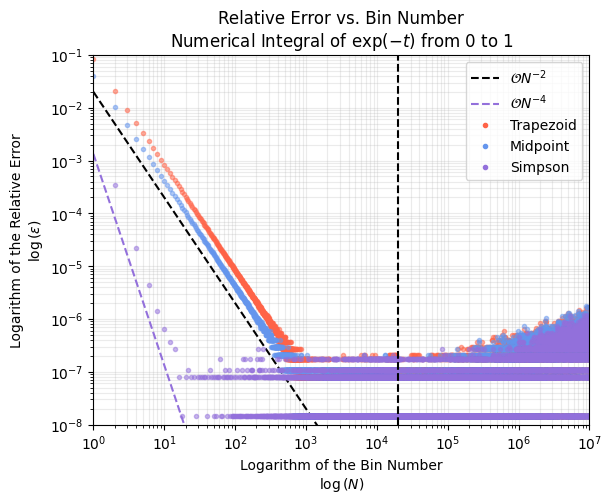

In [78]:
# Part (b)

numpoints=1e4

def nexp(t, **kwargs):
    return -np.exp(-t, **kwargs)
def expn(t, **kwargs):
    return np.exp(-t, **kwargs)
def relative_error(actual, mine, original, a, b, N):
    actvalue = actual(b, dtype=np.float64)-actual(a, dtype=np.float64)
    return np.abs((actvalue - mine(original, a, b, N))/actvalue)

Earr = np.logspace(0,7,10)
plt.loglog(Earr,Earr**(-2) /50,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}N^{-2}$", color="black")
plt.loglog(Earr,Earr**(-4) /750,
           linestyle='--', marker='', alpha = 1, label="$\\mathcal{O}N^{-4}$", color="mediumpurple")

aval = 0
bval = 1
Narr = np.concatenate([np.arange(1, 2e4, dtype=np.float32),
                         np.array(list(set(np.logspace(4,7,int(numpoints), dtype=np.int32))), dtype=np.float32)])
NarrS = np.concatenate([np.arange(2, 2e4, 2, dtype=np.float32),
                         2*np.array(list(set(np.logspace(4,6.69897,int(numpoints), dtype=np.int32))), dtype=np.float32)])
plt.loglog(Narr,relative_error(nexp, trapezoid, expn, aval, bval, Narr),
           linestyle='', marker='.', label="Trapezoid", color="tomato")
plt.loglog(Narr,relative_error(nexp, midpoint, expn, aval, bval, Narr),
           linestyle='', marker='.', label="Midpoint", color="cornflowerblue")
plt.loglog(NarrS,relative_error(nexp, simpson, expn, aval, bval, NarrS),
           linestyle='', marker='.', label="Simpson", color="mediumpurple")
plt.axvline(2e4,linestyle='--',color="black")


plt.title("Relative Error vs. Bin Number\nNumerical Integral of $\\exp(-t)$ from 0 to 1")
plt.xlabel("Logarithm of the Bin Number\n$\\log{(N)}$")
plt.ylabel("Logarithm of the Relative Error\n$\\log{(\\varepsilon)}$")

### Legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
### 

[handle.set_alpha(0.5) for handle in handles[2:]]
plt.ylim(1e-8,0.1)
plt.xlim(1,1e7)
plt.grid(which='both',alpha=0.25)
plt.savefig("new_integration.png", dpi=300, bbox_inches='tight')
plt.show()

#### Problem 3

In cosmology, density fluctuations in the matter distribution are characterized by a power spectrum, $P(k)$, the RMS amplitude fluctuations of the density waves, as a function of wavenumber $k$ (with units of h/Mpc). In configuration space, these density fluctuations are described by the correlation function, $\xi (r)$, at a given scale $r$, usually in Mpc/h. These two quantities are related by

$$\xi (r) = \frac{1}{2\pi^2}\int k^2 P(k)\frac{\sin{(kr)}}{kr}\,\,\mathrm{d}k$$

With this homework, I have attached a tabulated power spectrum. The first column is $k$, and the second column is $P(k)$ (pay no attention to the third column). Using whatever integration method you prefer, use the above equation to calculate $\xi (r)$ in the range $r=[50,120]$ Mpc/h. The power spectrum is tabulated in logarithmic intervals in $k$, due to its power-law like nature. You may choose to use an interpolation technique, such as cubic spline, to help evaluate the integral.

Around $k\approx 0.1$, you can see oscillatory behavior in $P(k)$. We call these the "baryon wiggles," and they manifest as a single "bump" in the correlation function at large scales. Using your calculation for $\xi (r)$, determine the scales, $r$, of the peak of this bump. Make a plot of $r^2\xi(r)$ over the required range in $r$ (multiplying by $r^2$ visually enhances the bump). Indicate on this plot the scale of the peak, also known as the "baryon acoustic oscillation" (BAO) peak.


In [79]:
df = pd.read_csv("/home/xavier/Downloads/lcdm_z0.matter_pk", sep='\s+', header=None)
k = np.array(df[0])
Pk = np.array(df[1])

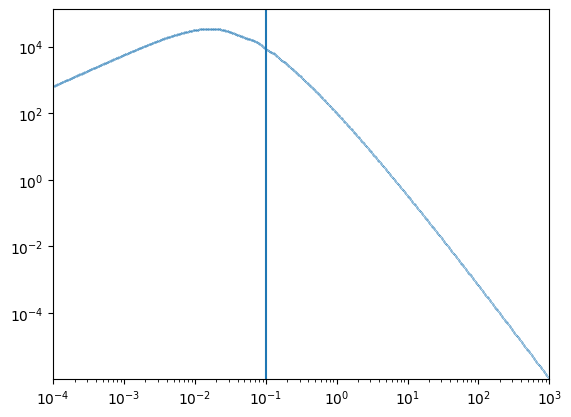

In [80]:
plt.loglog(k,Pk,linestyle='',marker='.',markersize=0.5)
plt.axvline(0.1)
plt.xlim(min(k),max(k))
plt.ylim(min(Pk),max(Pk)+1e5)
plt.show()

In [81]:
k = np.append(np.array([1e-7]),np.array(df[0]))
Pk = np.append(np.array([1e-7]),np.array(df[1]))


In [82]:
Pspline = interp.InterpolatedUnivariateSpline(k,Pk)

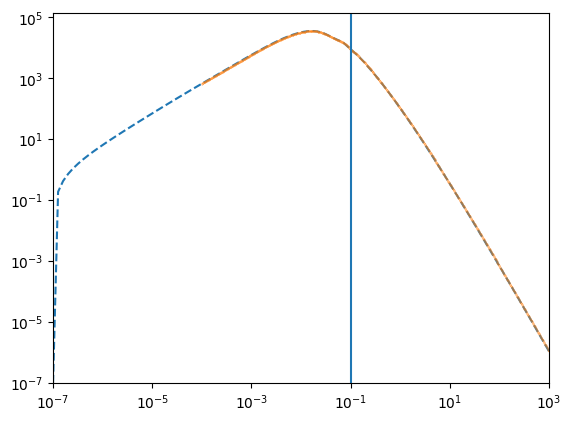

In [83]:
karr = np.logspace(-7,3,int(1e2))
plt.loglog(karr,Pspline(karr),linestyle='--',markersize=0.5)
plt.loglog(k,Pk,linestyle='',marker='.',markersize=0.5)
plt.axvline(0.1)
plt.xlim(min(karr),max(karr))
plt.ylim(min(Pk),max(Pk)+1e5)
plt.show()

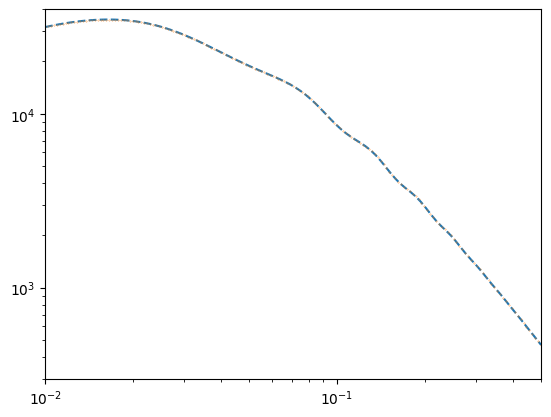

In [84]:
karr = np.logspace(-2,-0.3,int(1e2))
plt.loglog(karr,Pspline(karr),linestyle='--',markersize=0.5)
plt.loglog(k,Pk,linestyle='',marker='.',markersize=0.5)
#plt.axvline(0.1)
plt.xlim(min(karr),max(karr))
plt.ylim(3e2,4e4)
plt.show()

In [85]:
def integrand(k,r):
    return k * k * Pspline(k) * (np.sin(k*r)/(k*r))

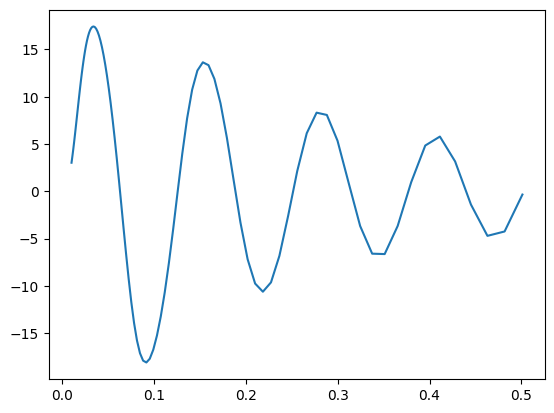

In [86]:
plt.plot(karr, integrand(karr,50))

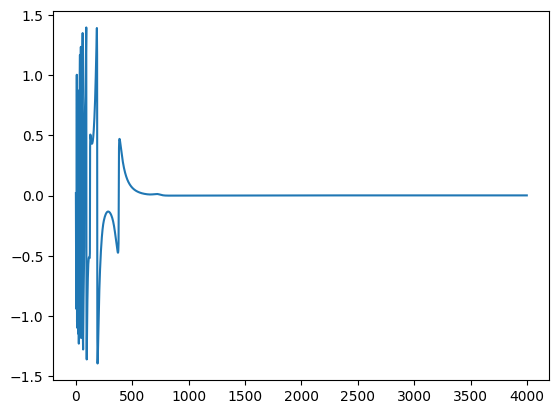

In [87]:
def new_integrand(k):
    return k * k * Pspline(k) * (np.sin(k*120)/(k*120))
Ns = np.arange(2, 4000, 2, dtype=np.float32)
plt.plot(Ns,simpson(new_integrand, 1e-7, 1e1, Ns))

In [88]:
def r2xi(r, integrand, a, b, N):
    r = np.float32(r)
    a = np.float32(a)
    b = np.float32(b)
    N = np.float32(N)
    resultarr = []
    for i in r:
        def new_integrand(k):
            return integrand(k,i)
        resultarr.append(i*i*(1/(2*np.pi*np.pi)) * simpson(new_integrand, a, b, N))
        
    resultarr = np.array(resultarr)
    return resultarr

94.91491491491492


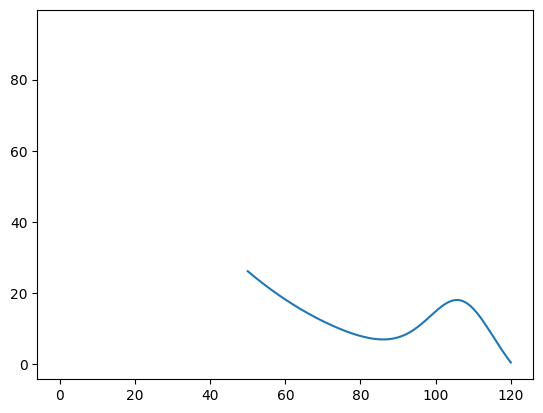

In [89]:
rvals = np.linspace(50,120,int(1e3))
ytest = r2xi(rvals, integrand, 1e-7, 1e3, [1e5])
plt.plot(rvals, ytest)
plt.plot(rvals[641])
print(rvals[641])

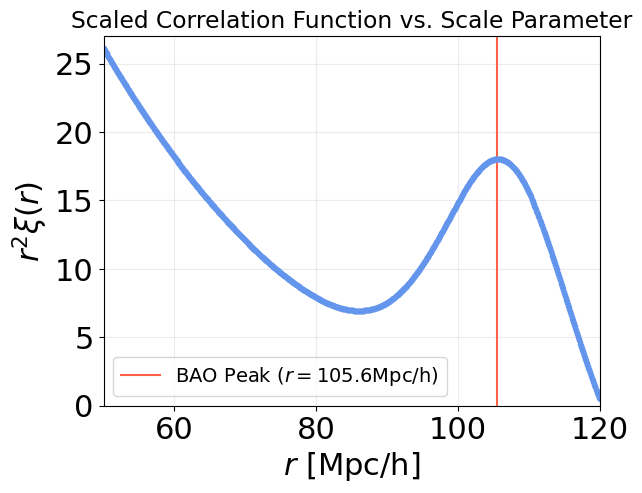

In [37]:
rvals = np.linspace(50,120,int(1e3))
ytest = r2xi(rvals, integrand, 1e-7, 1e3, [1e5])
plt.axvline(105.6,color="tomato", label = "BAO Peak ($r=105.6$Mpc/h)")

plt.plot(rvals,ytest,
           linestyle='', marker='.', color="cornflowerblue")

plt.rcParams.update({'font.size': 14})
plt.title("Scaled Correlation Function vs. Scale Parameter")
plt.legend()
plt.rcParams.update({'font.size': 22})
plt.ylabel("$r^2\\xi(r)$")
plt.xlabel("$r$ [Mpc/h]")


plt.ylim(0,27)
plt.xlim(50,120)
plt.grid(which='both',alpha=0.25)
plt.savefig("xi.png", dpi=300, bbox_inches='tight')
plt.show()

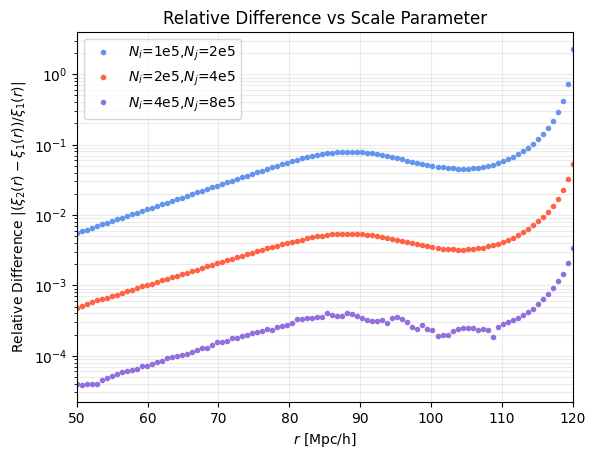

In [90]:
rvals = np.linspace(50,120,int(1e2))
ytest = r2xi([100], integrand, 1e-7, 1e3, [1e2,1e3,1e4,1e5])
Nvals = [1e5,2e5]
#print(np.abs((ytest[0][1]-ytest[0][0])/ytest[0][0]))
rval =[100,120]
resultarr = []
for i in range(len(Nvals)-1):
    resultarr.append(np.abs(
            (r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i]])-r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i+1]]))
                /r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i]])
            )
         )

plt.plot(rvals,resultarr[0],label="$N_i$=1e5,$N_j$=2e5", linestyle='', marker='.', color="cornflowerblue")
#plt.axvline(105.6,color="tomato", label = "BAO Peak ($r=105.6$Mpc/h)")

Nvals = [2e5,4e5]
#print(np.abs((ytest[0][1]-ytest[0][0])/ytest[0][0]))
rval =[100,120]
resultarr = []
for i in range(len(Nvals)-1):
    resultarr.append(np.abs(
            (r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i]])-r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i+1]]))
                /r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i]])
            )
         )

plt.plot(rvals,resultarr[0],label="$N_i$=2e5,$N_j$=4e5", linestyle='', marker='.', color="tomato")
#plt.axvline(105.6,color="tomato", label = "BAO Peak ($r=105.6$Mpc/h)")

Nvals = [4e5,8e5]
#print(np.abs((ytest[0][1]-ytest[0][0])/ytest[0][0]))
rval =[100,120]
resultarr = []
for i in range(len(Nvals)-1):
    resultarr.append(np.abs(
            (r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i]])-r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i+1]]))
                /r2xi(rvals, integrand, 1e-7, 1e3, [Nvals[i]])
            )
         )

plt.semilogy(rvals,resultarr[0],label="$N_i$=4e5,$N_j$=8e5", linestyle='', marker='.', color="mediumpurple")
#plt.axvline(105.6,color="tomato", label = "BAO Peak ($r=105.6$Mpc/h)")


plt.title("Relative Difference vs Scale Parameter")

plt.ylabel("Relative Difference $|(\\xi_2(r)-\\xi_1(r))/\\xi_1(r)|$")
plt.xlabel("$r$ [Mpc/h]")

plt.legend()
#plt.ylim(0,27)
plt.xlim(50,120)
plt.grid(which='both',alpha=0.25)
plt.savefig("relative_difference.png", dpi=300, bbox_inches='tight')
plt.show()
    
#plt.plot(rvals,resultarr[0])
    

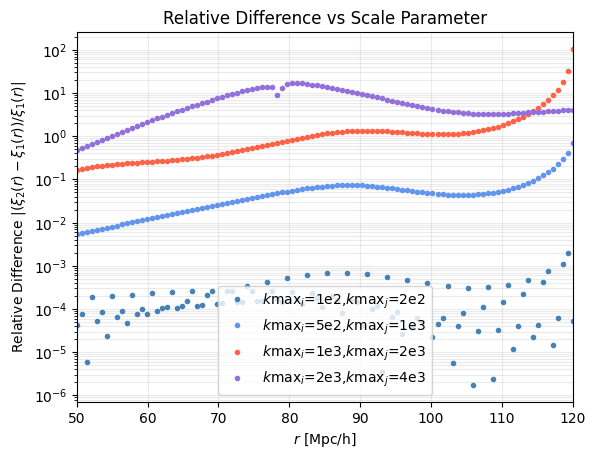

In [74]:
rvals = np.linspace(50,120,int(1e2))
ytest = r2xi([100], integrand, 1e-7, 1e3, [1e2,1e3,1e4,1e5])
Nvals = [9e5,1e6]
kmin = 1e-7
kmax = 1e2
kmaxj = 2e2
#print(np.abs((ytest[0][1]-ytest[0][0])/ytest[0][0]))
rval =[100,120]
resultarr = []
for i in range(len(Nvals)-1):
    resultarr.append(np.abs(
            (r2xi(rvals, integrand, kmin, kmax, [1e5])-r2xi(rvals, integrand, kmin, kmaxj, [1e5]))
                /r2xi(rvals, integrand, kmin, kmax, [1e5])
            )
         )

plt.plot(rvals,resultarr[0],label="$k$max$_i$=1e2,$k$max$_j$=2e2", linestyle='', marker='.', color="steelblue")
#plt.axvline(105.6,color="tomato", label = "BAO Peak ($r=105.6$Mpc/h)")

kmin = 1e-7
kmax = 5e2
kmaxj = 1e3
#print(np.abs((ytest[0][1]-ytest[0][0])/ytest[0][0]))
rval =[100,120]
resultarr = []
for i in range(len(Nvals)-1):
    resultarr.append(np.abs(
            (r2xi(rvals, integrand, kmin, kmax, [1e5])-r2xi(rvals, integrand, kmin, kmaxj, [1e5]))
                /r2xi(rvals, integrand, kmin, kmax, [1e5])
            )
         )

plt.plot(rvals,resultarr[0],label="$k$max$_i$=5e2,$k$max$_j$=1e3", linestyle='', marker='.', color="cornflowerblue")
#plt.axvline(105.6,color="tomato", label = "BAO Peak ($r=105.6$Mpc/h)")

kmax = 1e3
kmaxj = 2e3
Nvals = [1e6,2e6]
#print(np.abs((ytest[0][1]-ytest[0][0])/ytest[0][0]))
rval =[100,120]
resultarr = []
for i in range(len(Nvals)-1):
    resultarr.append(np.abs(
            (r2xi(rvals, integrand, kmin, kmax, [1e5])-r2xi(rvals, integrand, kmin, kmaxj, [1e5]))
                /r2xi(rvals, integrand, kmin, kmax, [1e5])
            )
         )

plt.plot(rvals,resultarr[0],label="$k$max$_i$=1e3,$k$max$_j$=2e3", linestyle='', marker='.', color="tomato")
#plt.axvline(105.6,color="tomato", label = "BAO Peak ($r=105.6$Mpc/h)")

kmax = 2e3
kmaxj = 4e3
Nvals = [2e6,4e6]
#print(np.abs((ytest[0][1]-ytest[0][0])/ytest[0][0]))
rval =[100,120]
resultarr = []
for i in range(len(Nvals)-1):
    resultarr.append(np.abs(
            (r2xi(rvals, integrand, kmin, kmax, [1e5])-r2xi(rvals, integrand, kmin, kmaxj, [1e5]))
                /r2xi(rvals, integrand, kmin, kmax, [1e5])
            )
         )

plt.semilogy(rvals,resultarr[0],label="$k$max$_i$=2e3,$k$max$_j$=4e3", linestyle='', marker='.', color="mediumpurple")
#plt.axvline(105.6,color="tomato", label = "BAO Peak ($r=105.6$Mpc/h)")


plt.title("Relative Difference vs Scale Parameter")

plt.ylabel("Relative Difference $|(\\xi_2(r)-\\xi_1(r))/\\xi_1(r)|$")
plt.xlabel("$r$ [Mpc/h]")

plt.legend()
#plt.ylim(0,27)
plt.xlim(50,120)
plt.grid(which='both',alpha=0.25)
#plt.savefig("xi.png", dpi=300, bbox_inches='tight')
plt.show()

### Notes

**a)**
If you use spline interpolation, you are not required to code that up yourself. You may use a pre-packaged routine (or numerical recipes code).

**b)**
Formally, the limits of the integral are from $k=0$ to $k=\infty$. Note that $P(0)=0$. You may choose a finite upper limit, provided you can determine if your limit is robust.

**c)**
The 'h' in the distance units refers to the Hubble constant h $=H_0/100$, which sets the distance scale and is thus incorporated into the distance units, since its value is unknown.